# Energy consumption EDA
#### Brief analysis of the energy consumption of my apartment in one month.

Let's start by importing the necessary libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Before starting the analysis, the dataframe must be loaded, in this case from a **.csv** file containing the consumption in Kilowatt-Hour (kWh) per hour and day. The dataset contains data for 33 days.

In [2]:
consumption = pd.read_csv('energy_consumption.csv', delimiter=';', header=0)

Let's take a look at the dataset. The first column indicates the date of the measure, the second, the hour of that day and the third, the consumption.

In [3]:
consumption.head()

,Date,Hour,kWh
0,09/07/2022,1,0.050
1,09/07/2022,2,0.080
2,09/07/2022,3,0.051
3,09/07/2022,4,0.070
4,09/07/2022,5,0.058


Before I can start working with the dataframe I need convert the dates in the first column to a datetime format.

In [4]:
consumption['Date'] = pd.to_datetime(consumption['Date'], dayfirst=True, format="%d/%m/%Y")

Now, I want to see the total consumption of each day and sort it to check the day I consumed more energy.


In [5]:
consumption_per_day = (consumption
              .groupby(['Date'])
              ['kWh']
              .sum()
              .round(2)
              .reset_index()
              .sort_values(by='kWh', 
                           ascending=False)
)


The day I spent the most was July 28th (5.52 kWh).

In [6]:
consumption_per_day.head()

,Date,kWh
19,2022-07-28,5.52
23,2022-08-01,5.18
15,2022-07-24,5.07
16,2022-07-25,4.91
9,2022-07-18,4.89


It would also be interesting to check which day of the week is the one with more consumption (and the one with least). Let's add a column with the name of the weekday.

In [7]:
consumption_per_day['Weekday'] = consumption_per_day['Date'].dt.day_name()

In [8]:
consumption_per_day.head()

,Date,kWh,Weekday
19,2022-07-28,5.52,Thursday
23,2022-08-01,5.18,Monday
15,2022-07-24,5.07,Sunday
16,2022-07-25,4.91,Monday
9,2022-07-18,4.89,Monday


Let's create a new dataframe with the total consumption of the month per weekday, calculating the mean consumption of each weekday of the month.

In [9]:
consumption_grouped_weekday = (consumption_per_day
                      .groupby('Weekday')
                      ['kWh']
                      .mean()
                      .round(2)
                      .reset_index()
                      .sort_values(by='kWh', 
                                   ascending=False)
)

Considering the mean consumption, the days with more consumption are Mondays and the days with the least are Fridays.

In [10]:
consumption_grouped_weekday

,Weekday,kWh
1,Monday,4.54
4,Thursday,4.19
2,Saturday,4.05
3,Sunday,3.62
6,Wednesday,3.56
5,Tuesday,3.46
0,Friday,3.24


It makes sense, as Mondays and Thursdays are the days I usually work from home and thus the consumption should be higher than other days of the month. Let's plot the data to visualize the comparision between days properly.

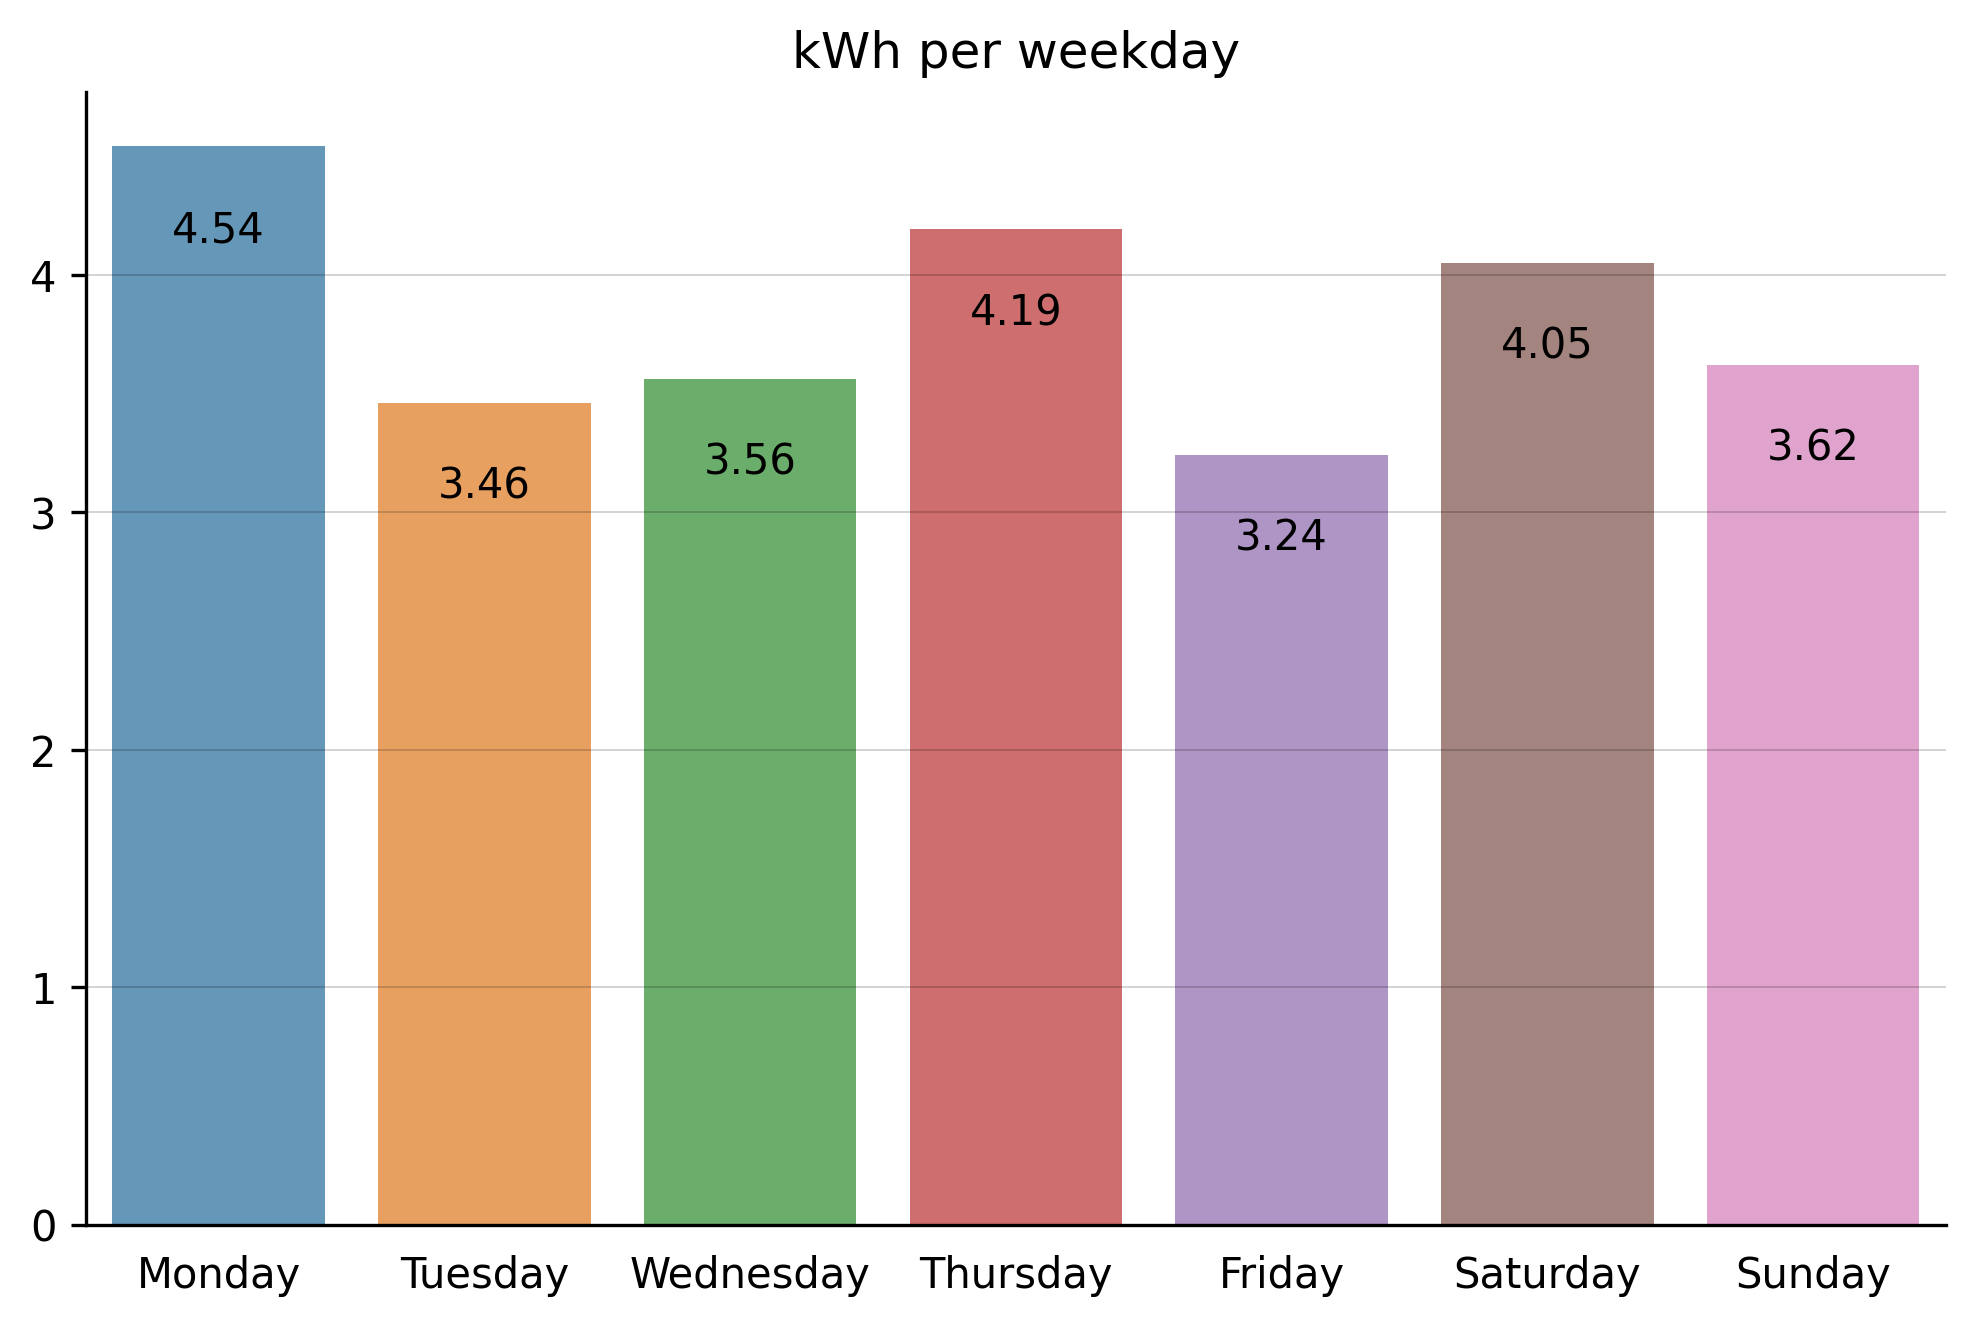

In [11]:
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

fig, ax = plt.subplots(figsize = (6, 4), 
                       dpi=300)

barplot = sns.barplot(data=consumption_grouped_weekday, 
                        x='Weekday',
                        y='kWh',
                        ax=ax, 
                        alpha=0.75,
                        order= day_order)

ax.grid(visible=True, 
        which='major', 
        color='black', 
        linewidth=0.08, 
        axis='y')

ax.bar_label(ax.containers[0], 
             padding=-25, 
             fontsize=10)

ax.xaxis.set_ticks_position('none')

barplot.set_ylabel('')
barplot.set_xlabel('')
barplot.set_title('kWh per weekday')

sns.set_palette('pastel')
sns.despine()

plt.show()

Now, let's check which hour is the one with a higher mean consumption.

In [12]:
consumption_per_hour = (consumption
               .groupby(['Hour'])
               ['kWh']
               .mean()
               .round(2)
               .reset_index()
               .sort_values(by='kWh', 
                            ascending=False)
)

In [13]:
consumption_per_hour.head()

,Hour,kWh
21,22,0.29
20,21,0.27
23,24,0.26
22,23,0.25
14,15,0.24


Peak consumption is reached at 22:00 PM, it makes sense as the lights are usually on at night unit I go to bed at  1:00 AM.

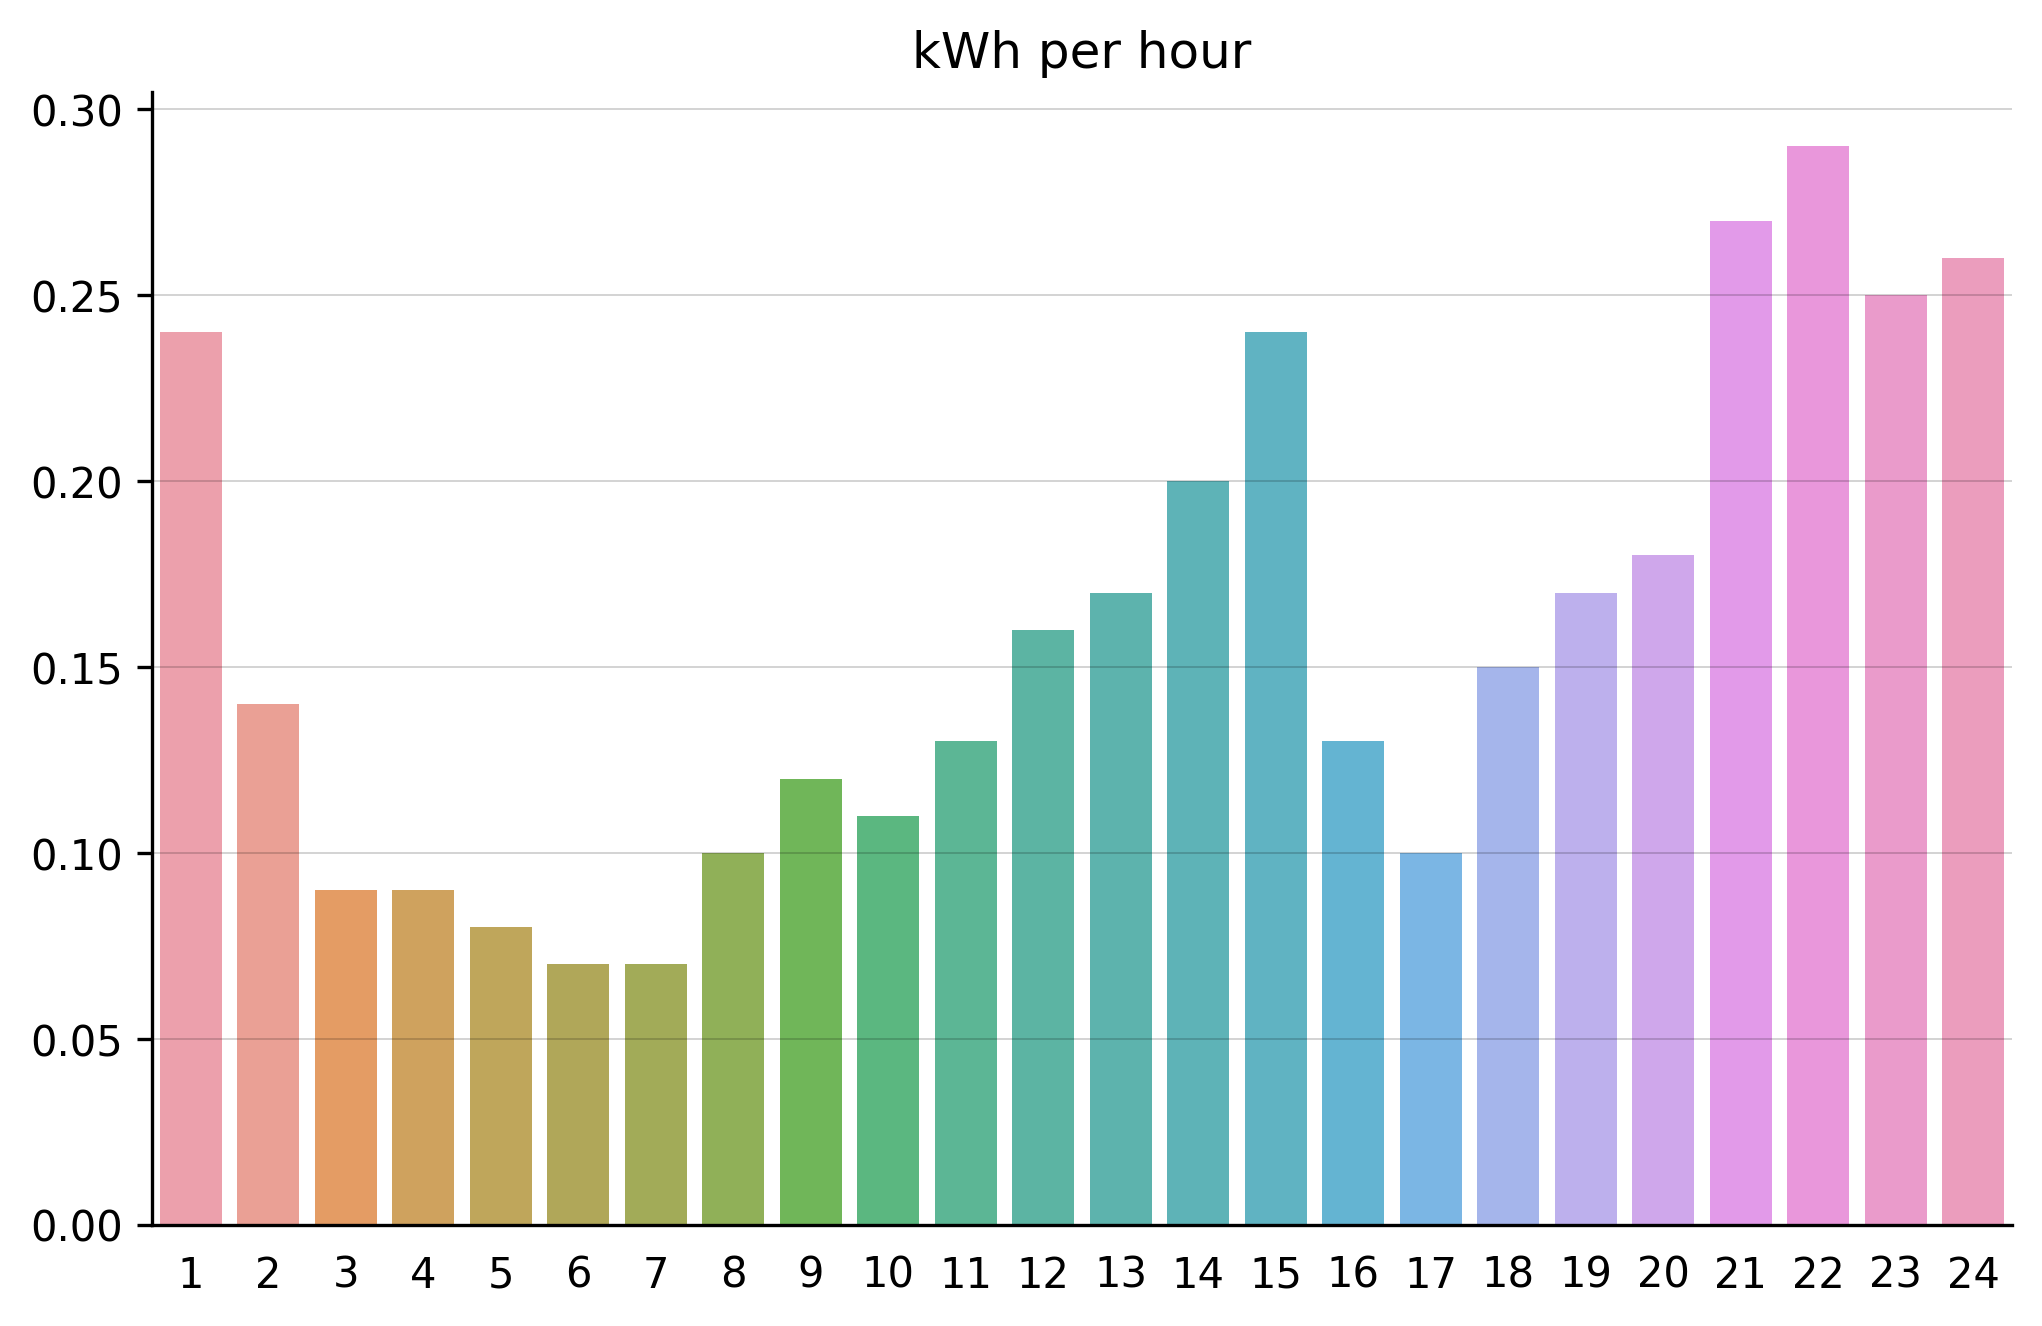

In [14]:
fig, ax = plt.subplots(figsize = (6, 4), dpi=300)

barplot = sns.barplot(data=consumption_per_hour, 
                        x='Hour',
                        y='kWh',
                        ax=ax, 
                        alpha=0.9)

ax.grid(visible=True, 
        which='major', 
        color='black', 
        linewidth=0.08, 
        axis='y')

ax.xaxis.set_ticks_position('none')

barplot.set_ylabel('')
barplot.set_xlabel('')
barplot.set_title('kWh per hour')

sns.set_palette('pastel')
sns.despine()

plt.show()

Finally, lets get the mean and median of the consumption per day to get an estimate of the usual consumption in a given day.

In [15]:
print(f'Mean daily consumption: {consumption_per_day["kWh"].mean():.2f} kWh')
print(f'Median daily consumption: {consumption_per_day["kWh"].median():.2f} kWh')

Mean daily consumption: 3.81 kWh
Median daily consumption: 3.66 kWh


A mean daily consumption of 3.81 kWh means that, on average, a 31 day month should total 118.11 kWh.